<a href="https://colab.research.google.com/github/hpal007/ElectoralBondAnalysis/blob/main/electoral_bond_analysis_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=6535ff37ceef1e16dae98dc29bdfe2941691bf92d998ad8328c46e7caf7e6864
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:

df =(spark
     .read
     .format("csv")
     .option("header", True)
     .option("inferSchema",True)
     .load("/content/drive/MyDrive/pyspark-data/electrol_bond_company.csv"))
df.show()


+----------------+--------------------+------------+
|Date of Purchase|      Purchaser Name|Denomination|
+----------------+--------------------+------------+
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19| A B C INDIA LIMITED|   10,00,000|
|       12-Apr-19| A B C INDIA LIMITED|   10,00,000|
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19| A B C INDIA LIMITED|   10,00,000|
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19| A B C INDIA LIMITED|    1,00,000|
|       12-Apr-19|ACROPOLIS MAINTEN...|    1,00,000|
|       12-Apr-19|ACROPOLIS MAINTEN...|   10,00,000|
|       12-Apr-19|ACROPOLIS MAINTEN...|    1,0

In [4]:
df = df.withColumnRenamed("Date of Purchase", "date_of_purchase") \
        .withColumnRenamed("Purchaser Name", "purchaser_name") \
        .withColumnRenamed("Denomination", "denomination")

In [5]:
df.columns

['date_of_purchase', 'purchaser_name', 'denomination']

In [6]:
df.dtypes

[('date_of_purchase', 'string'),
 ('purchaser_name', 'string'),
 ('denomination', 'string')]

In [7]:
from pyspark.sql.functions import col, to_date, regexp_replace

df = df.withColumn("date_of_purchase", to_date(col("date_of_purchase"), 'dd-MM-yy')) \
        .withColumn("denomination", regexp_replace(df.denomination, ",", "").cast("int") )

In [10]:
df.printSchema()

root
 |-- date_of_purchase: date (nullable = true)
 |-- purchaser_name: string (nullable = true)
 |-- denomination: integer (nullable = true)



number of parties recived donations

In [12]:
from pyspark.sql.functions  import *
number_of_purchaser = df.select("purchaser_name").distinct().count()
all_purchaser = df.select("purchaser_name").distinct()

In [13]:
number_of_purchaser

1319

In [14]:
all_purchaser.show(n=30, truncate=False)

+----------------------------------------+
|purchaser_name                          |
+----------------------------------------+
|MOHINDERKUMAR JAIN                      |
|SHAHIEXP                                |
|MADANLAL LTD.                           |
|RAHUL TULSIAN                           |
|LAURELSECURITIESPVTLTD                  |
|BYRAPANENI SHIVARJUN RAO                |
|WELSPUN ENTERPRISES LTD                 |
|BALU CEMENT CORPORATION                 |
|HARDESH ORES PVT LTD                    |
|VIVEK AGARWAL                           |
|WONDER MINERALSPVT LTD.                 |
|SKP MERCHANTS LLP                       |
|RAY CONSTRUCTIONS LTD                   |
|SUSHIL KUMAR KOTHARI                    |
|RAJAPUSHPA ASSET MANAGEMENT LLP         |
|SELMAR LAB PRIVATE LTD                  |
|RAKESH PRAVINCHANDRA SHAH               |
|N RAMAMOORTHY                           |
|MIRANIA BUILDERS LLP                    |
|TRIDENTCHEMPHARLIMITED                  |
|ARAVALI TE

In [15]:

purchasers_by_amount = df.groupBy("purchaser_name").agg(sum(col("denomination")).alias("total_denomination")).orderBy(col("total_denomination").desc())

In [16]:
purchasers_by_amount.show(n=30, truncate=False)

+------------------------------------------------+------------------+
|purchaser_name                                  |total_denomination|
+------------------------------------------------+------------------+
|FUTURE GAMING AND HOTEL SERVICES PR             |12080000000       |
|MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED  |8210000000        |
|QWIKSUPPLYCHAINPRIVATELIMITED                   |4100000000        |
|HALDIA ENERGY LIMITED                           |3770000000        |
|VEDANTA LIMITED                                 |3756500000        |
|ESSEL MINING AND INDS LTD                       |2245000000        |
|WESTERN UP POWER TRANSMISSION COMPANY LI MITED  |2200000000        |
|KEVENTER FOODPARK INFRA LIMITED                 |1950000000        |
|MADANLAL LTD.                                   |1855000000        |
|BHARTI AIRTEL LIMITED                           |1830000000        |
|YASHODA SUPER SPECIALITY HOSPITAL               |1620000000        |
|UTKAL ALUMINA INTER

In [33]:
purchaser_amount_gt_100cr = purchasers_by_amount.filter(purchasers_by_amount.total_denomination >= 1000000000)

In [44]:
purchaser_amount_gt_100cr.withColumnRenamed("total_denomination","total_denomination_above_100cr").show(truncate=False)

+----------------------------------------------+------------------------------+
|purchaser_name                                |total_denomination_above_100cr|
+----------------------------------------------+------------------------------+
|FUTURE GAMING AND HOTEL SERVICES PR           |12080000000                   |
|MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED|8210000000                    |
|QWIKSUPPLYCHAINPRIVATELIMITED                 |4100000000                    |
|HALDIA ENERGY LIMITED                         |3770000000                    |
|VEDANTA LIMITED                               |3756500000                    |
|ESSEL MINING AND INDS LTD                     |2245000000                    |
|WESTERN UP POWER TRANSMISSION COMPANY LI MITED|2200000000                    |
|KEVENTER FOODPARK INFRA LIMITED               |1950000000                    |
|MADANLAL LTD.                                 |1855000000                    |
|BHARTI AIRTEL LIMITED                  

In [17]:
import pandas as pd

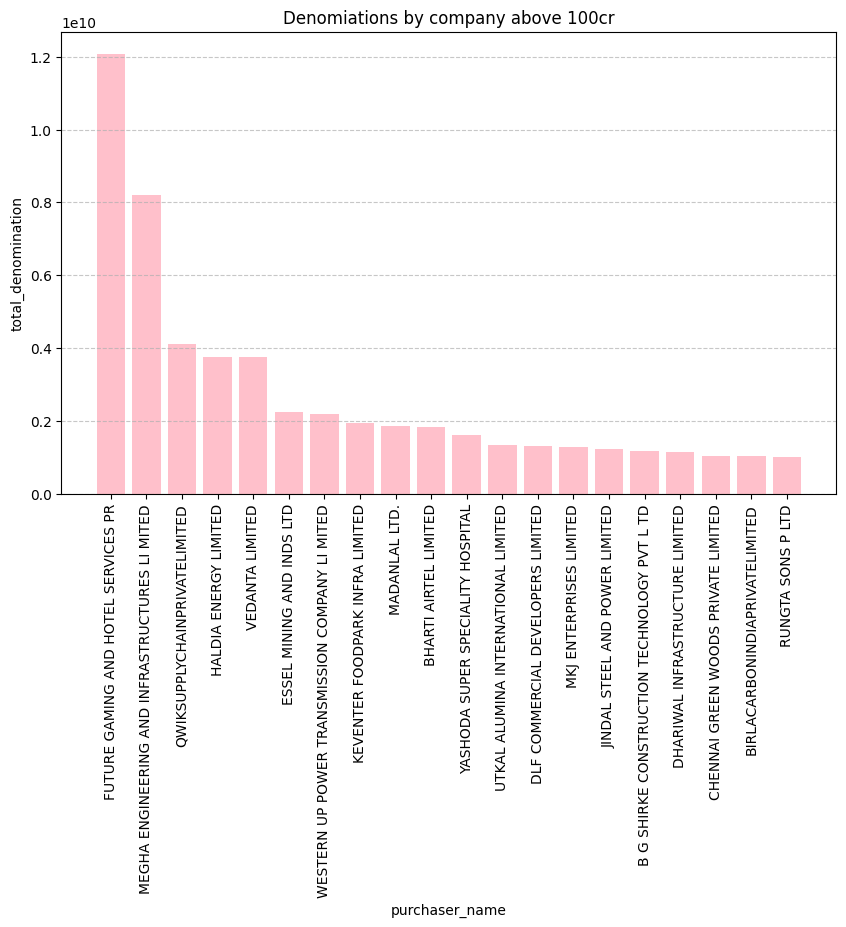

In [43]:
pandas_df = purchaser_amount_gt_100cr.toPandas()
# pandas_df.plot(x='party', y='total_denomination', kind='bar', title='Line Graph')

import matplotlib.pyplot as plt

# Plotting a bar graph
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.bar(pandas_df['purchaser_name'], pandas_df['total_denomination'], color='pink')  # Plot the bars

plt.xlabel('purchaser_name')  # Add x-axis label
plt.ylabel('total_denomination')  # Add y-axis label
plt.title('Denomiations by company above 100cr')  # Add title
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.xticks(rotation=90)
# Show the plot
plt.show()